<a href="https://colab.research.google.com/github/thecognifly/AIYVisionKit_Utils/blob/master/Darth_Vader_Exporting_Testing_Compiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exporting and testing the model trained in the notebook:  
https://github.com/thecognifly/AIYVisionKit_Utils/blob/master/Darth_Vader_Training.ipynb


The convertion to AIY Vision Bonnet doesn't work with tf1.15.x because the frozen model uses some ops that are not recognized by the compiler. Therefore, here I'm using tf1.14 instead. I could use an older version, but then it will not work with the current cuda stuff and I will need to reinstall that too. If you need to use an older version of TensorFlow, here is how you install the cuda stuff for the tf1.12:
```
# Necessary for using tf 1.12 (not sure about the other versions)
# https://stackoverflow.com/a/54445624
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!apt-get install cuda=9.0.176-1
```

In [2]:
!pip install git+git://github.com/ricardodeazambuja/colab_utils.git

  Cloning git://github.com/ricardodeazambuja/colab_utils.git to /tmp/pip-req-build-hgx5ridq
  Running command git clone -q git://github.com/ricardodeazambuja/colab_utils.git /tmp/pip-req-build-hgx5ridq
  Created wheel for colab-utils: filename=colab_utils-0.2-cp36-none-any.whl size=19461 sha256=3ed0b3178594094ad00d9722edcceaa7097124e13d0c255f43e909290f754b23
  Stored in directory: /tmp/pip-ephem-wheel-cache-log25tz7/wheels/21/75/32/38aeb76b2424385f43eae9fd28c98e084308f4f6d9cb0a4f97
Successfully built colab-utils


In [ ]:
# all the below stuff is for visualing a graph without using tensorboard (and tensorboad is too slow for big stuff anyway)
!apt-get install poppler-utils > /dev/null # to convert the pdf with the graph into a bitmap image
!apt-get install graphviz > /dev/null
!pip install tfgraphviz > /dev/null

# Exporting
These first cells are only needed for exporting the model. After exporting it once it's easier just to load it from disk.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ls #sanity check...

drive/  sample_data/


In [4]:
!pip uninstall tensorflow -y

Uninstalling tensorflow-2.4.0:
  Successfully uninstalled tensorflow-2.4.0


In [5]:
!uname -a
!lsb_release -a
!nvidia-smi

Linux 3c888c269d33 4.19.112+ #1 SMP Thu Jul 23 08:00:38 PDT 2020 x86_64 x86_64 x86_64 GNU/Linux
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [6]:
# We don't need a GPU for this...
!pip install tensorflow==1.14 > /dev/null

In [7]:
!python -c "import tensorflow as tf; print(tf.__version__)" # python version for the shell commands
# FutureWarning seems to be a Numpy problem: https://stackoverflow.com/a/58546467
# You could catch it: https://www.cicoria.com/tensorflow-suppressing-futurewarning-numpy-messages-in-jupyter-notebooks/

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [9]:
# Another way of doing the same as above... but now the notebook will have it
import tensorflow as tf
tf.__version__ # python version for the notebook

'1.14.0'

In [10]:
import os

# The lines below will allow me to easily switch between colab and local notebooks
MYNOTEBOOKPATH = '/content/' # inside the notebook
os.environ['MYNOTEBOOKPATH'] = MYNOTEBOOKPATH # in the shell commands

!echo "MYNOTEBOOKPATH="$MYNOTEBOOKPATH
print(f"MYNOTEBOOKPATH={MYNOTEBOOKPATH}")

MYNOTEBOOKPATH=/content/
MYNOTEBOOKPATH=/content/


In [11]:
!cd $MYNOTEBOOKPATH && git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 24.35 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [12]:
!cd $MYNOTEBOOKPATH/cocoapi/PythonAPI && make > /dev/null 2> /dev/null

In [13]:
# Remember, it was tested on my fork of the object detection API
!cd $MYNOTEBOOKPATH && git clone https://github.com/ricardodeazambuja/models.git && cd $MYNOTEBOOKPATH/models && git checkout laptop_rtx

Cloning into 'models'...
remote: Enumerating objects: 34169, done.
remote: Total 34169 (delta 0), reused 0 (delta 0), pack-reused 34169
Receiving objects: 100% (34169/34169), 518.63 MiB | 33.44 MiB/s, done.
Resolving deltas: 100% (22330/22330), done.
Checking out files: 100% (2502/2502), done.
Branch 'laptop_rtx' set up to track remote branch 'laptop_rtx' from 'origin'.
Switched to a new branch 'laptop_rtx'


In [14]:
!cp -r $MYNOTEBOOKPATH/cocoapi/PythonAPI/pycocotools $MYNOTEBOOKPATH/models/research/

In [15]:
os.chdir(f"{MYNOTEBOOKPATH}models/research/") # for changing the current working directory everywhere
                                              # remember: shells here are actually sub-shells(??)

In [18]:
pwd # Double checking...

'/content/models/research'

In [19]:
!protoc object_detection/protos/*.proto --python_out=.

In [20]:
!echo $PYTHONPATH

/env/python


In [21]:
import os
import sys
RESEARCHPATH = os.path.join(MYNOTEBOOKPATH,"models/research")
if RESEARCHPATH not in os.environ['PYTHONPATH']:
  print(f"Changing the $PYTHONPATH from:\n{os.environ['PYTHONPATH']}")
  os.environ['PYTHONPATH'] = os.environ['PYTHONPATH'] + ":" + RESEARCHPATH + ":" + os.path.join(RESEARCHPATH, "slim")
  print(f"To:\n{os.environ['PYTHONPATH']}")

if RESEARCHPATH not in "".join(sys.path):
  print(f"Changing the system path from:\n{sys.path}")
  sys.path.append(RESEARCHPATH)
  sys.path.append(os.path.join(RESEARCHPATH, "slim"))
  print(f"To:\n{sys.path}")

Changing the $PYTHONPATH from:
/env/python
To:
/env/python:/content/models/research:/content/models/research/slim
Changing the system path from:
['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']
To:
['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content/models/research', '/content/models/research/slim']


In [22]:
# Now the PYTHONPATH should include everything...
!echo $PYTHONPATH

/env/python:/content/models/research:/content/models/research/slim


In [23]:
# if it's working, it gives at the end 'OK (skipped=1)'
!python $MYNOTEBOOKPATH/models/research/object_detection/builders/model_builder_test.py 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Checking available checkpoints

In [24]:
!find '/content/drive/My Drive/Checkpoints/DarthVader/' -name 'model.ckpt-*.meta' # list the available checkpoints
!find '/content/drive/My Drive/Checkpoints/DarthVader/' -name 'model.ckpt-*.meta' | wc -l # count 

/content/drive/My Drive/Checkpoints/DarthVader/model.ckpt-0.meta
/content/drive/My Drive/Checkpoints/DarthVader/model.ckpt-832.meta
/content/drive/My Drive/Checkpoints/DarthVader/model.ckpt-1680.meta
/content/drive/My Drive/Checkpoints/DarthVader/model.ckpt-2490.meta
/content/drive/My Drive/Checkpoints/DarthVader/model.ckpt-3322.meta
/content/drive/My Drive/Checkpoints/DarthVader/model.ckpt-4142.meta
/content/drive/My Drive/Checkpoints/DarthVader/model.ckpt-4962.meta
/content/drive/My Drive/Checkpoints/DarthVader/model.ckpt-5792.meta
/content/drive/My Drive/Checkpoints/DarthVader/model.ckpt-6000.meta
/content/drive/My Drive/Checkpoints/DarthVader/model.ckpt-6813.meta
/content/drive/My Drive/Checkpoints/DarthVader/model.ckpt-7643.meta
/content/drive/My Drive/Checkpoints/DarthVader/model.ckpt-8482.meta
/content/drive/My Drive/Checkpoints/DarthVader/model.ckpt-9342.meta
/content/drive/My Drive/Checkpoints/DarthVader/model.ckpt-10232.meta
/content/drive/My Drive/Checkpoints/DarthVader/mode

In [26]:
# https://github.com/google/aiyprojects-raspbian/issues/314#issuecomment-389317428
try:
  sess.close()
except:
  pass

# We start by removing the old frozen (exported) graph (model)
!rm -rf "/content/drive/My Drive/Checkpoints/DarthVader/output_inference_graph_v1.pb" > /dev/null 2> /dev/null

# And now we export it
# It's possible to choose a different checkpoint by changing:
# --trained_checkpoint_prefix "/content/drive/My Drive/Checkpoints/DarthVader/model.ckpt-24958" \
!python /content/models/research/object_detection/export_inference_graph.py \
    --input_type image_tensor \
    --input_shape 1,256,256,3 \
    --pipeline_config_path "/content/drive/My Drive/Datasets/DarthVader/ssd_mobilenetv1_256x256_AIY_VOC2012.config" \
    --trained_checkpoint_prefix "/content/drive/My Drive/Checkpoints/DarthVader/model.ckpt-24958" \
    --output_directory "/content/drive/My Drive/Checkpoints/DarthVader/output_inference_graph_v1.pb" \
    --write_inference_graph \
    --checkpoint_version=2

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [27]:
# Let's confirm it was exported
!ls "/content/drive/My Drive/Checkpoints/DarthVader/output_inference_graph_v1.pb/" -al

total 3877
-rw------- 1 root root      77 Dec 21 14:51 checkpoint
-rw------- 1 root root  760650 Dec 21 14:51 frozen_inference_graph.pb
-rw------- 1 root root 1769583 Dec 21 14:51 inference_graph.pbtxt
-rw------- 1 root root  413008 Dec 21 14:51 model.ckpt.data-00000-of-00001
-rw------- 1 root root    7853 Dec 21 14:51 model.ckpt.index
-rw------- 1 root root 1007766 Dec 21 14:51 model.ckpt.meta
-rw------- 1 root root    4976 Dec 21 14:51 pipeline.config
drwx------ 3 root root    4096 Dec 21 14:51 saved_model


# Testing the frozen model
from: https://leimao.github.io/blog/Save-Load-Inference-From-TF-Frozen-Graph/

In [28]:
# Only use this if the models was already compiled or it will fail the compilation!
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [29]:
import tensorflow as tf
import numpy as np

In [30]:
try:
  sess.close()
except:
  pass
  
finally:
  sess = tf.Session()

In [31]:
# https://stackoverflow.com/questions/46127471/how-to-get-weights-from-pb-model-in-tensorflow
GRAPH_PB_PATH = '/content/drive/My Drive/Checkpoints/DarthVader/output_inference_graph_v1.pb/frozen_inference_graph.pb'

print("Loading graph from frozen model...")
with tf.gfile.GFile(GRAPH_PB_PATH,'rb') as f:
  graph_def = tf.GraphDef()
  graph_def.ParseFromString(f.read())
  sess.graph.as_default()
  tf.import_graph_def(graph_def, name='')
  nodes=[n for n in graph_def.node]
  print(f"Number of nodes: {len(nodes)}")

Loading graph from frozen model...
Number of nodes: 1839


### If you want to visualize the graph without tensorboard

In [ ]:
import tfgraphviz as tfg

# It will generate a pdf that has so many vectors that it's very hard to visualize anyway...
g = tfg.board(tf.get_default_graph(), depth=1)
g.view()

'G.gv.pdf'

In [ ]:
!pdftoppm -png G.gv.pdf graph

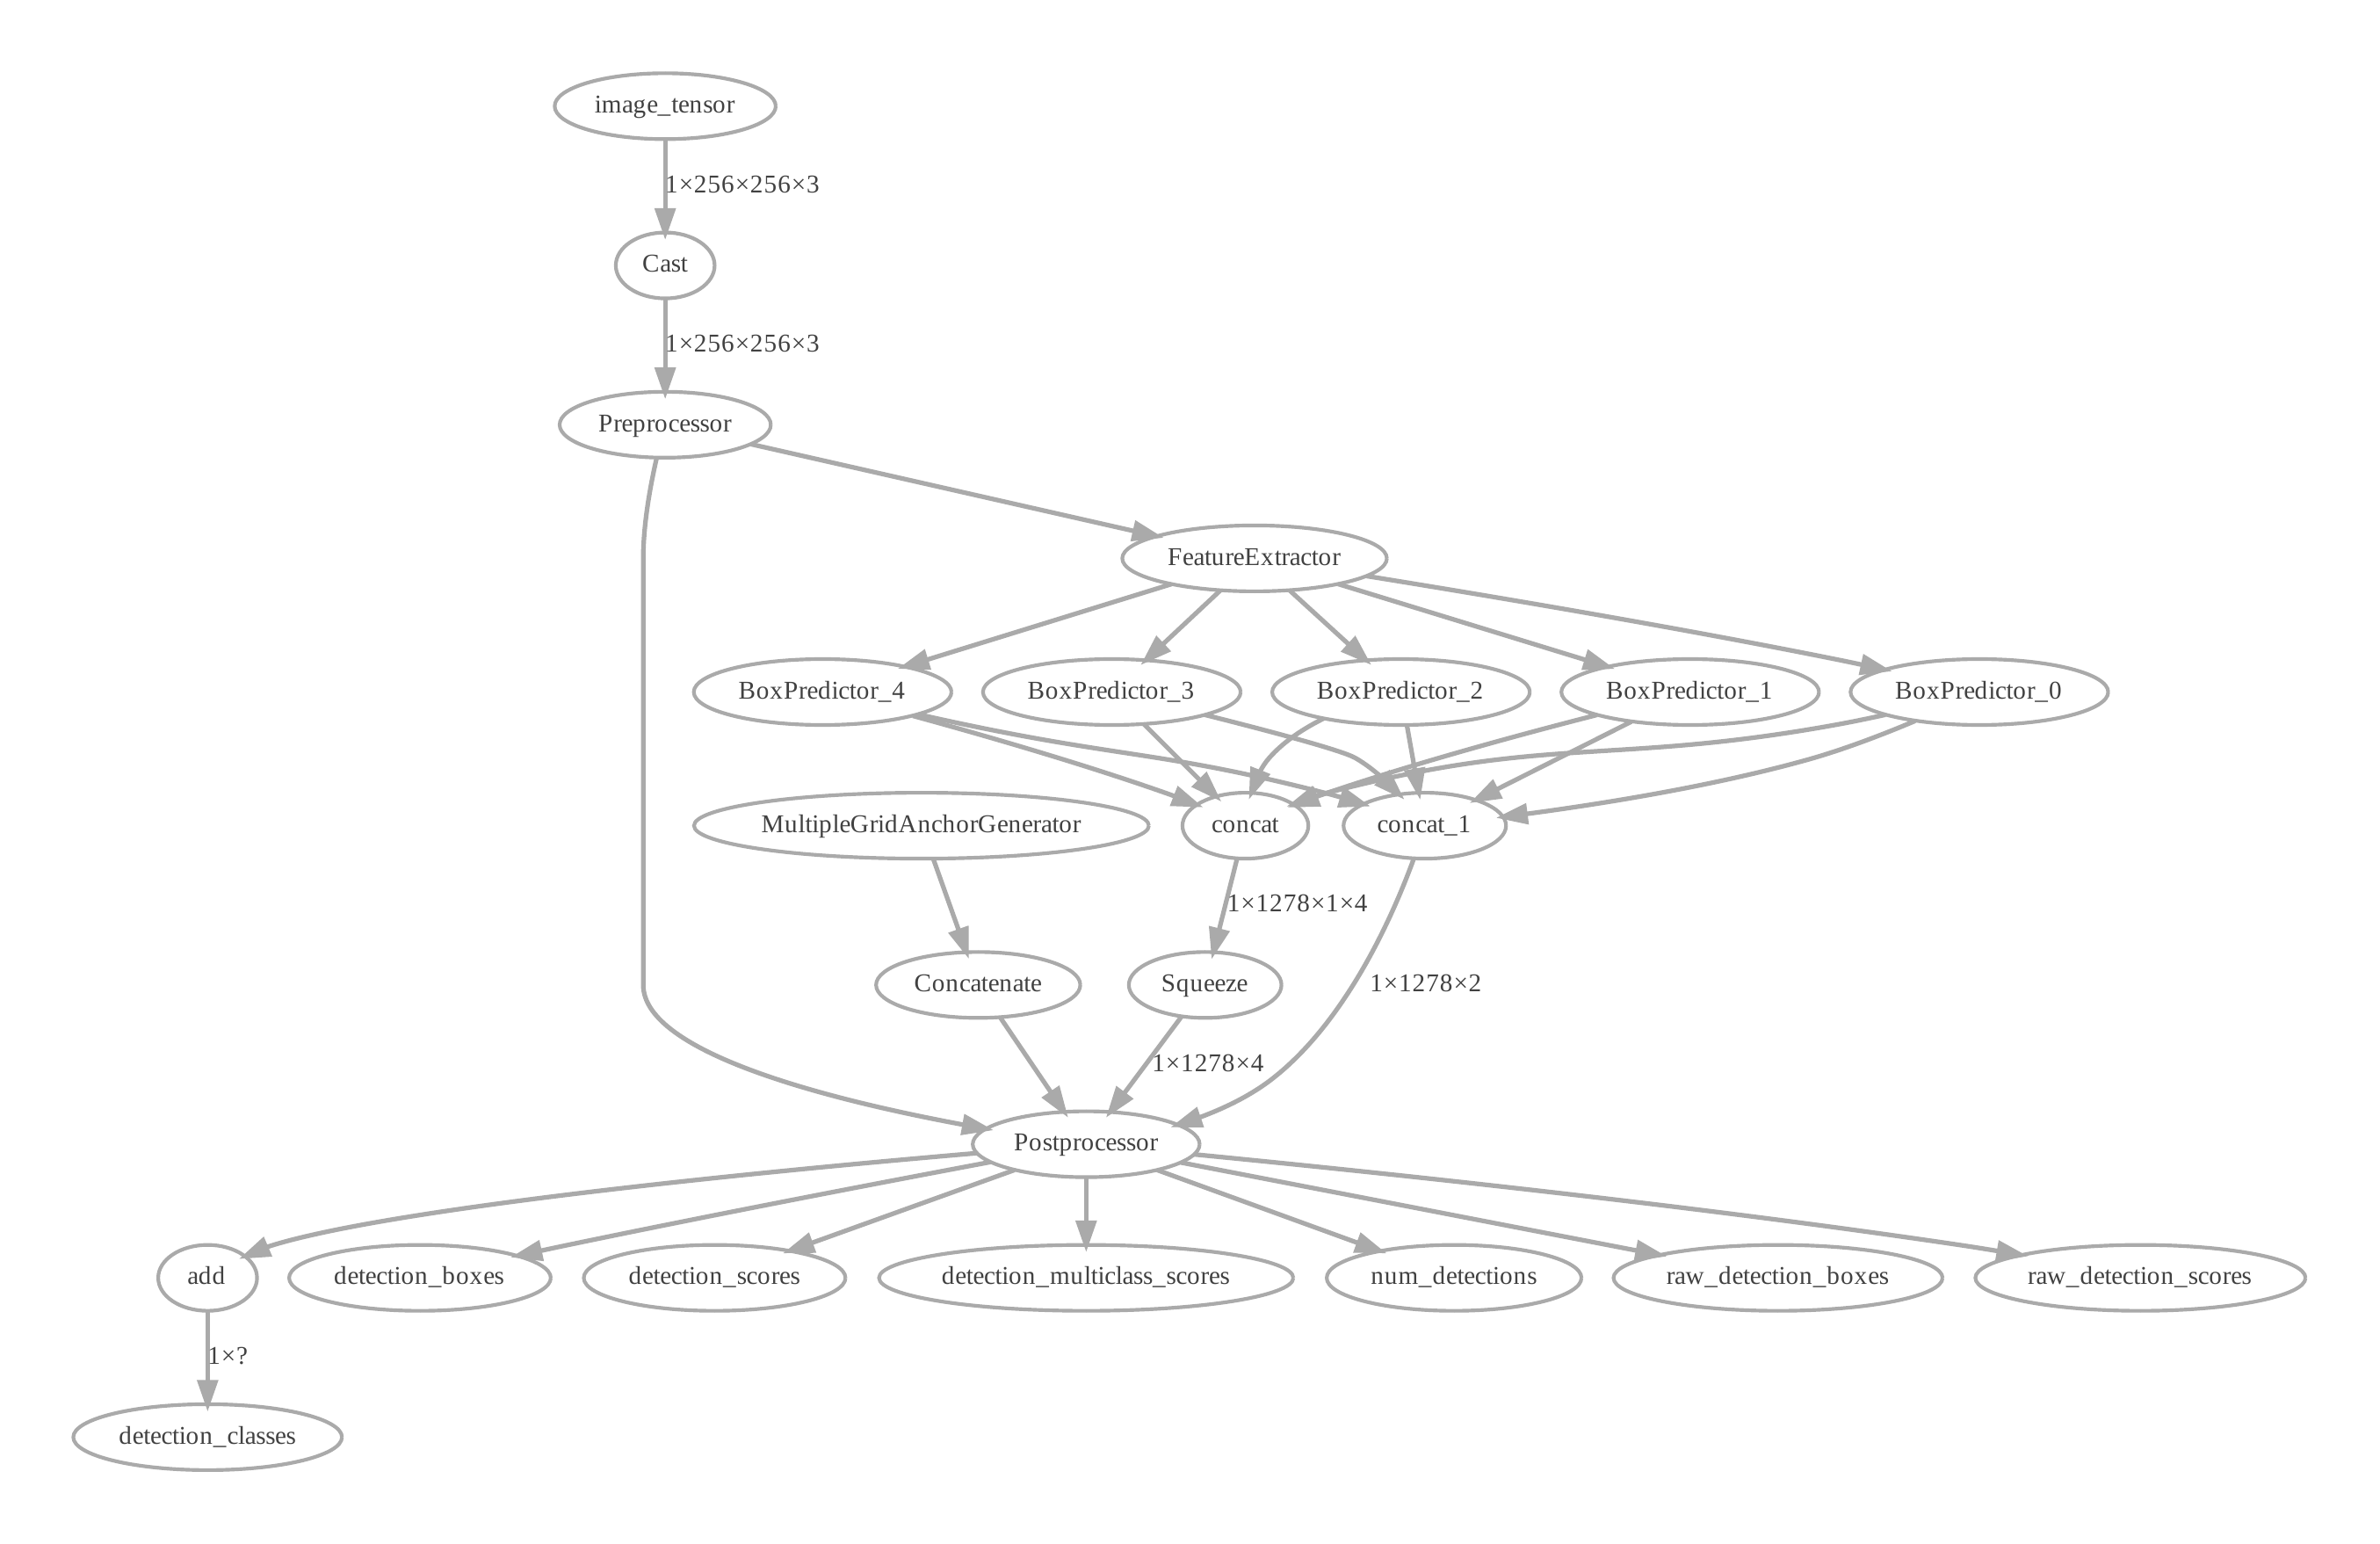

In [ ]:
from IPython.display import Image
Image('graph-1.png', height=500, width=1000)

## The cells below are only here if someone wants to explore more

In [ ]:
print('Find the input placeholders:')
input_nodes = [(i, n.name + ' => ' +  n.op) for i,n in enumerate(graph_def.node) if n.op in ('Placeholder')]
for node in input_nodes:
    print(node)

Find the input placeholders:
(0, 'image_tensor => Placeholder')


In [ ]:
graph = tf.get_default_graph()
layers = [(i, op.name, op) for i,op in enumerate(graph.get_operations()) if op.name in ['image_tensor','Preprocessor/sub', 'concat', 'concat_1', 'detection_boxes']]
for l in layers:
  print(l)

(0, 'image_tensor', <tf.Operation 'image_tensor' type=Placeholder>)
(12, 'Preprocessor/sub', <tf.Operation 'Preprocessor/sub' type=Sub>)
(1331, 'concat', <tf.Operation 'concat' type=ConcatV2>)
(1334, 'concat_1', <tf.Operation 'concat_1' type=ConcatV2>)
(1832, 'detection_boxes', <tf.Operation 'detection_boxes' type=Identity>)


In [ ]:
graph = tf.get_default_graph()
# Test if this version of tf uses the opname below
opname = 'detection_boxes'#'MultipleGridAnchorGenerator/Identity' #'FusedBatchNorm'
layers = [(i, op.name, op, op.inputs) for i,op in enumerate(graph.get_operations()) if (opname.lower() in str(op.type).lower()) or (opname.lower() in str(op.name).lower())]
if not len(layers):
  print(f"It doesn't use {opname}!!!")
else:
  print(f"This model has {len(layers)} using the op above!")
  print(f"First layer found:\n{layers[0]}")

This model has 4 using the op above!
First layer found:
(1832, 'detection_boxes', <tf.Operation 'detection_boxes' type=Identity>, <tensorflow.python.framework.ops.Operation._InputList object at 0x7fe3fecc1f98>)


In [ ]:
layers[0][3]._inputs

[<tf.Tensor 'Postprocessor/BatchMultiClassNonMaxSuppression/stack_6:0' shape=(1, ?, ?) dtype=float32>]

In [ ]:
graph = tf.get_default_graph()
layers = [op.name for op in graph.get_operations()]
print(f'Total number of layers: {len(layers)}')
layers[-10:]

Total number of layers: 5002


['Postprocessor/Squeeze_1',
 'add/y_1',
 'add_1',
 'detection_boxes_1',
 'detection_scores_1',
 'detection_multiclass_scores_1',
 'detection_classes_1',
 'num_detections_1',
 'raw_detection_boxes_1',
 'raw_detection_scores_1']

In [ ]:
# Check the input tensor
graph.get_tensor_by_name("image_tensor:0")

<tf.Tensor 'image_tensor:0' shape=(1, 256, 256, 3) dtype=uint8>

## Let's prepare our model to do inference by selecting the input and outputs.

In [32]:
graph = tf.get_default_graph()

input_tensor = graph.get_tensor_by_name("image_tensor:0")

output_tensor1 = graph.get_tensor_by_name("detection_boxes:0")
output_tensor2 = graph.get_tensor_by_name("detection_scores:0")
output_tensor3 = graph.get_tensor_by_name("detection_classes:0")

output_tensor01 = graph.get_tensor_by_name("concat:0") #_ANCHOR_TENSOR_NAME
output_tensor02 = graph.get_tensor_by_name("concat_1:0") #_SCORE_TENSOR_NAME

We need images to test it!

In [33]:
cd "/content/drive/My Drive/Datasets/DarthVader"

/content/drive/My Drive/Datasets/DarthVader


In [34]:
FILENAME_PREFIX = "darthvader_test"


# If the filenames all started with the same string and it ends only with numbers...
file_list = !ls | grep {FILENAME_PREFIX} | sort -V # ls -1v does the same job as sort, but it may not work on macs...
file_list[:10]

['darthvader_test1.png',
 'darthvader_test2.png',
 'darthvader_test3.png',
 'darthvader_test4.png',
 'darthvader_test5.png',
 'darthvader_test6.png',
 'darthvader_test7.png',
 'darthvader_test8.png',
 'darthvader_test9.png',
 'darthvader_test10.png']

In [35]:
import os
from PIL import Image, ImageDraw
import numpy as np

In [36]:
def inference_on_image(img):
  data = np.asarray(img, np.uint8)
  input_image = [data]
  return sess.run([output_tensor1, output_tensor2, output_tensor3, output_tensor01, output_tensor02], feed_dict = {input_tensor: input_image})  

In [37]:
def draw_boxes(img, output):
  draw = ImageDraw.Draw(img)
  w,h = img.size
  highest_score = output[1][0].argsort()[-1]
  highest_score_val = output[1][0][highest_score]
  best_box = output[0][0][highest_score]
  best_class_id = output[2][0][highest_score]

  for box,score,class_id in zip(output[0][0], output[1][0],output[2][0]):
    draw.rectangle([box[1]*w, box[0]*h, box[3]*w, box[2]*h], fill=None, outline=None)
    draw.text((box[1]*w+2, box[0]*h+2), str(int(class_id))+": "+str(score))

  draw.rectangle([best_box[1]*w, best_box[0]*h, best_box[3]*w, best_box[2]*h], fill=None, outline="red", width=2)
  draw.text((best_box[1]*w+2, best_box[0]*h+2), str(int(best_class_id))+": "+str(highest_score_val), fill="red")

  return img

In [38]:
# https://github.com/NVIDIA/DIGITS/blob/master/examples/semantic-segmentation/pascal-voc-classes.txt

# I only have one class (darthvader), so it's background and my class
# It's using """ because of the \n
voc_str = """background
darthvader"""

voc_classes = dict(enumerate(voc_str.split('\n')))
voc_classes

{0: 'background', 1: 'darthvader'}

Now, let's test all images

In [39]:
# Load all the images from the list of filenames generated earlier
try:
  len(images)==len(filename)
except:
  images = []
  for filename in file_list:
    if not ("output" in filename): # to avoid loading images with previous outputs...
      images.append(Image.open(os.path.join("/content/drive/My Drive/Datasets/DarthVader",filename)))

In [40]:
img_with_boxes = []
for img in images:
  output = inference_on_image(img)[:3]
  img_with_boxes.append(draw_boxes(img.copy(), output))
  main_path = ['/']+img.filename.split("/")[:-1]
  filename = "output_"+img.filename.split("/")[-1]
  img_with_boxes[-1].save(os.path.join(*(main_path+[filename])))

<IPython.core.display.Javascript object>


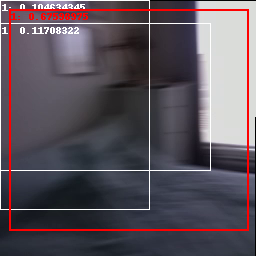

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
from colab_utils import imshow

for img in img_with_boxes:
  imshow(img)

My model was [trained](https://github.com/thecognifly/AIYVisionKit_Utils/blob/master/Darth_Vader_Training.ipynb) with one class, so it can only detect that class or not. My Darth Vader clock is mostly black, so in a lot of situations the images will have lots of it too when illumination is poor. In addition to that, I changed the original model from up to 100 detections to only 3:
```
max_detections_per_class: 3
max_total_detections: 3
```
Not sure if this is helping or making things worse...

### Preparation for the RPI
The compiled version will use concat and concat_1 as its outputs, so it's interesting to create the tools based on that for later testing on the RPI side.

The layers used by the compiled model give one step before the boxes, so the intersection over union stuff needs to be done on the RPI side. I got extra info from the links below:


https://github.com/google/aiyprojects-raspbian/blob/aiyprojects/src/examples/vision/object_detection.py


https://github.com/chadwallacehart/aiy_custom_cat_detector/blob/master/aiy_cat_detection.py

https://medium.com/@venuktan/vectorized-intersection-over-union-iou-in-numpy-and-tensor-flow-4fa16231b63d

In [42]:
import sys

from PIL import ImageDraw
import numpy as np

def area(box_encodings):
  widths = box_encodings[:,2]
  heights = box_encodings[:,3]

  return widths*heights


def intersection(box_encodings1, box_encodings2):
    x1 = box_encodings1[:,0]
    y1 = box_encodings1[:,1]
    width1 = box_encodings1[:,2]
    height1 = box_encodings1[:,3]

    x2 = box_encodings2[:,0]
    y2 = box_encodings2[:,1]
    width2 = box_encodings2[:,2]
    height2 = box_encodings2[:,3]

    x = np.maximum(x1,x2)
    y = np.maximum(y1,y2)
    
    width = np.maximum(np.minimum(x1 + width1, x2 + width2) - x, 0)
    height = np.maximum(np.minimum(y1 + height1, y2 + height2) - y, 0)
    
    return width * height


def IoU(box_encodings1, box_encodings2):
    intersection_area = intersection(box_encodings1, box_encodings2)
    union_area = area(box_encodings1) + area(box_encodings2) - intersection_area
    result = np.zeros(len(intersection_area))
    result[union_area>0] = intersection_area[union_area>0] / union_area[union_area>0]

    return result

def draw_boxes(img, output):
    draw = ImageDraw.Draw(img)
    w,h = img.size
    highest_score = output[1][0].argsort()[-1]
    highest_score_val = output[1][0][highest_score]
    best_box = output[0][0][highest_score]
    best_class_id = output[2][0][highest_score]

    for box,score,class_id in zip(output[0][0], output[1][0],output[2][0]):
        draw.rectangle([box[1]*w, box[0]*h, box[3]*w, box[2]*h], fill=None, outline=None)
        draw.text((box[1]*w+2, box[0]*h+2), str(int(class_id))+": "+str(score))

    draw.rectangle([best_box[1]*w, best_box[0]*h, best_box[3]*w, best_box[2]*h], fill=None, outline="red", width=2)
    draw.text((best_box[1]*w+2, best_box[0]*h+2), str(int(best_class_id))+": "+str(highest_score_val), fill="red")

    return img

# based on https://github.com/google/aiyprojects-raspbian/blob/aiyprojects/src/examples/vision/object_detection.py
def decode_box_encoding(box_encodings, anchors):
    """Decodes bounding box encoding.

    Args:
      box_encodings: numpy array with shape (number of boxes, 4)
      anchors: numpy array with shape (number of boxes, 4)
    Returns:
      (xmin, ymin, xmax, ymax), each has range [0.0, 1.0].
    """
    y_scale = 10.0
    x_scale = 10.0
    height_scale = 5.0
    width_scale = 5.0

    rows, columns = anchors.shape

    # rel_y_translation = box_encoding[0] / y_scale
    # rel_x_translation = box_encoding[1] / x_scale
    # rel_height_dilation = box_encoding[2] / height_scale
    # rel_width_dilation = box_encoding[3] / width_scale
    rel_yxhw = box_encodings.reshape((rows, columns))/np.array([y_scale,x_scale,height_scale,width_scale])
    
    # anchor_ymin, anchor_xmin, anchor_ymax, anchor_xmax = anchor
    # anchor_ycenter = (anchor_ymax + anchor_ymin) / 2
    # anchor_xcenter = (anchor_xmax + anchor_xmin) / 2
    # anchor_height = anchor_ymax - anchor_ymin
    # anchor_width = anchor_xmax - anchor_xmin
    anchor_ycenter = (anchors[:,2] + anchors[:,0]) / 2
    anchor_xcenter = (anchors[:,3] + anchors[:,1]) / 2
    anchor_height = anchors[:,2] - anchors[:,0]
    anchor_width = anchors[:,3] - anchors[:,1]

    # ycenter = anchor_ycenter + anchor_height * rel_y_translation
    # xcenter = anchor_xcenter + anchor_width * rel_x_translation
    # height = math.exp(rel_height_dilation) * anchor_height
    # width = math.exp(rel_width_dilation) * anchor_width
    ycenter = anchor_ycenter + anchor_height * rel_yxhw[:,0]
    xcenter = anchor_xcenter + anchor_width * rel_yxhw[:,1]
    height = np.exp(rel_yxhw[:,2]) * anchor_height
    width = np.exp(rel_yxhw[:,3]) * anchor_width

    # Finally it will clamp values to [0.0, 1.0] range, 
    # (the bounding boxes are relative to the img size)
    # so they will not fall outside of the image.
    xmin = np.clip(xcenter - width / 2, 0, 1)
    ymin = np.clip(ycenter - height / 2, 0, 1)
    xmax = np.clip(xcenter + width / 2, 0, 1)
    ymax = np.clip(ycenter + height / 2, 0, 1)


    return np.asarray([xmin, ymin, xmax, ymax]).T


def logistic(scores):
    return 1.0 / (1.0 + np.exp(-scores))


def draw_boxes_raw(img, boxes, scores, class_id=1, threshold=1.0, color = "green"):
    draw = ImageDraw.Draw(img)
    w,h = img.size

    for i,(box, score) in enumerate(zip(boxes, scores)):
        if score >= threshold:
            draw.rectangle([box[0]*w, box[1]*h, box[2]*w, box[3]*h], fill=None, outline=color)
            draw.text((box[0]*w+2, box[1]*h+2), f"{int(class_id)} : {score:0.3f} => {i}", fill=color)

    return img


def process_output_tensor(concat, concat_1, aiy_anchors, classes=[1], IoU_thres=0.5, raw_boxes=False, score_threshold=0):

  score_threshold = max(score_threshold, sys.float_info.epsilon)
  logit_score_threshold = np.log(score_threshold / (1 - score_threshold))

  #
  # I haven't test this when there're more than just background and one class...
  box_encodings = decode_box_encoding(concat, aiy_anchors)

  # Reshaping just to make like easier...
  logit_scores = concat_1.reshape(concat_1.shape[1],concat_1.shape[2]) 
  # logit_scores values are the sum of all outputs so they are not limited 0 to 1.

  detection_boxes, detection_scores, detection_classes = {}, {}, []

  for selected_class in classes:
    #
    # Everything that is ABOVE logit_score_threshold will be used
    #
    selected_indices = np.arange(len(logit_scores))[(logit_scores>logit_score_threshold)[:,selected_class]]

    if len(selected_indices)==0:
      break

    selected_val = logit_scores[selected_indices,selected_class]

    if raw_boxes:
      detection_boxes[selected_class] = box_encodings[selected_indices]
      detection_scores[selected_class] = selected_val
      detection_classes.append(selected_class)
      break

    #
    # Sort original indices according to the output values
    #
    selected_class_indices_argsorted = selected_indices[logit_scores[selected_indices][:,selected_class].argsort()[::-1]]

    bj = selected_class_indices_argsorted
    IoU_winners = []
    while True:
      bi = bj[0] # the index for the highest value
      IoU_res = IoU(box_encodings[bi].reshape((1,4)),box_encodings[bj[1:]])
      test = IoU_res>IoU_thres
      swallowed = bj[1:][test==True]
      IoU_winners.append((bi,
                          logit_scores[bi, selected_class],
                          len(swallowed)))
      if (test).all(): # there's nothing to test
        break
      else:
        bj = bj[1:][test==False]

    boxes = [i[0] for i in IoU_winners]
    scores = np.asarray([logistic(i[1]) for i in IoU_winners])    

    detection_boxes[selected_class] = box_encodings[boxes]
    detection_scores[selected_class] = scores
    detection_classes.append(selected_class)

  return detection_boxes, detection_scores, detection_classes

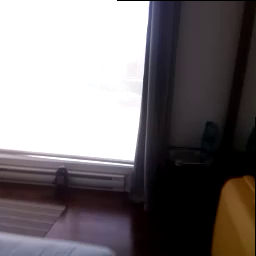

In [43]:
img = images[1]
img

In [44]:
detection_boxes, detection_scores, detection_classes, concat, concat_1 = inference_on_image(img)

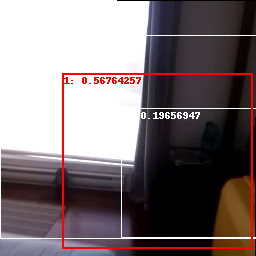

In [45]:
draw_boxes(img.copy(), [detection_boxes, detection_scores, detection_classes])

In [46]:
#
# Since the config file is the same as the person_cat_dog model in regard to ssd (besides the number of classes),
# it's possible to reuse the anchors.
#
# File found inside the oficial RPI Zero AIY image on /opt/aiy/models/
aiy_anchors = np.genfromtxt("/content/drive/My Drive/Datasets/DarthVader/mobilenet_ssd_256res_0.125_person_cat_dog_anchors.txt")
aiy_anchors.shape

(1278, 4)

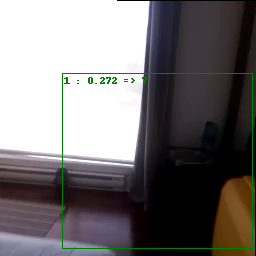

In [47]:
#
# Visualization of the boxes with raw outputs above zero and logits above threshold (see below)
#

detection_boxes, detection_scores, detection_classes = process_output_tensor(concat, concat_1, aiy_anchors, classes=[1], raw_boxes=True, score_threshold=0.1)
if len(detection_classes):
  display(draw_boxes_raw(img.copy(), detection_boxes[1], detection_scores[1], 1, threshold=0.2))

In [48]:
concat.shape, concat_1.shape, aiy_anchors.shape

((1, 1278, 1, 4), (1, 1278, 2), (1278, 4))

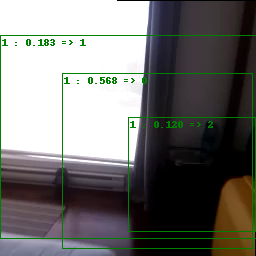

In [49]:
#
# Visualization of the boxes after Non Max Suppression with outputs above zero and logits above threshold (see below)
#
detection_boxes, detection_scores, detection_classes = process_output_tensor(concat, concat_1, aiy_anchors, classes=[1], IoU_thres=0.5, raw_boxes=False, score_threshold=0.1)
if detection_classes:
  display(draw_boxes_raw(img.copy(), detection_boxes[1], detection_scores[1], 1, threshold=0.0))

### AIY Vision Kit model compiler:
Apparently, the only problem with version above tf1.14.x is the generation of the frozen model. After that I can use the compiler below without any problems.

https://aiyprojects.withgoogle.com/vision#makers-guide--tensorflow-model-compiler

In [50]:
!wget -c https://dl.google.com/dl/aiyprojects/vision/bonnet_model_compiler_latest.tgz

--2020-12-21 15:03:49--  https://dl.google.com/dl/aiyprojects/vision/bonnet_model_compiler_latest.tgz
Resolving dl.google.com (dl.google.com)... 74.125.69.93, 74.125.69.136, 74.125.69.190, ...
Connecting to dl.google.com (dl.google.com)|74.125.69.93|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.google.com/dl/aiyprojects/vision/bonnet_model_compiler_2018_04_26.tgz [following]
--2020-12-21 15:03:50--  https://dl.google.com/dl/aiyprojects/vision/bonnet_model_compiler_2018_04_26.tgz
Reusing existing connection to dl.google.com:443.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [51]:
!tar xvf bonnet_model_compiler_latest.tgz

bonnet_model_compiler.par


In [52]:
!chmod u+x bonnet_model_compiler.par

In [53]:
!./bonnet_model_compiler.par \
  --frozen_graph_path='/content/drive/My Drive/Checkpoints/DarthVader/output_inference_graph_v1.pb/frozen_inference_graph.pb' \
  --output_graph_path=darthvader.binaryproto \
  --input_tensor_name="Preprocessor/sub" \
  --output_tensor_names="concat,concat_1" \
  --input_tensor_size=256 \
  --debug
  #
  # I didn't come up with "Preprocessor/sub" and "concat,concat_1" myself... 
  # it came from the famous issue thread on the AIY repo.

VisionBonnet model binary darthvader.binaryproto generated.


In [ ]:
cp darthvader.binaryproto /content/drive/My\ Drive/Checkpoints/DarthVader/.

Now, for testing on the RPI (after copying the test1.binaryproto):
```
$ python3 picamera_advanced_example_AIY.py --model_path /home/pi/darthvader.binaryproto --input_height 256 --input_width 256

```
My image for the RPI Zero W has jupyter installed, so you can use [this notebook](https://github.com/thecognifly/AIYVisionKit_Utils/blob/master/Testing_DarthVader_Detection.ipynb) to test it (jupyter takes a while to launch, but after that it's not that slow and you can visualize images in your browser).